In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.datasets import mnist

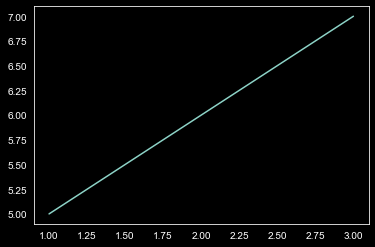

In [51]:
sns.set_style('white')
plt.style.use('dark_background')
plt.plot([1,2,3], [5,6,7])

In [71]:
(train_imagesf, y_trainf), (test_images, y_test) = mnist.load_data()

X_trainf = train_imagesf.reshape(60_000, 28, 28, 1) / 255
X_test = test_images.reshape(10_000, 28, 28, 1) / 255

X_train, X_valid, y_train, y_valid = train_test_split(X_trainf, y_trainf, test_size = 10000, random_state = 0)

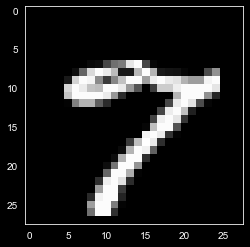

In [64]:
plt.imshow(X_train[0][:, :, 0], cmap = 'gray')

In [66]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)              

In [69]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 5, batch_size = 64)

Epoch 1/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0402 - val_accuracy: 0.9881
Epoch 2/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0336 - accuracy: 0.9897 - val_loss: 0.0283 - val_accuracy: 0.9906
Epoch 3/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0362 - val_accuracy: 0.9887
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0186 - accuracy: 0.9946 - val_loss: 0.0287 - val_accuracy: 0.9907
Epoch 5/5
782/782 [==============================] - 14s 19ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0332 - val_accuracy: 0.9895


In [72]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0342 - accuracy: 0.9893
[0.03422505035996437, 0.989300012588501]
